In [1]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix

In [2]:
# Chargement d'un nouveau fichier
dataframe_test1=pd.read_csv("billets_test.csv",sep=",")
display(dataframe_test1)

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [3]:
# Colonnes (ou features) à utiliser pour le clustering
features = ["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]
X_new = dataframe_test1[features]

# Charger le modèle K-means et le scaler sauvegardés et pré-entrainés
kmeans = joblib.load("kmeans_model.pkl")
scaler = joblib.load("scaler.pkl")

# Standardisation des nouvelles données avec le scaler sauvegardé
X_new_scaled = scaler.transform(X_new)

# Application du modèle K-means pour prédire les clusters
dataframe_test1["cluster"] = kmeans.predict(X_new_scaled)

# Définir les étiquettes TRUE/FALSE en fonction des clusters
dataframe_test1["True/False"] = dataframe_test1["cluster"].map({0: True, 1: False})

# Conserver uniquement les colonnes nécessaires
resultat = dataframe_test1[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low", "id", "cluster", "True/False"]]

# Affichage du DataFrame avec les clusters et les étiquettes prédits
display(resultat)

# Calcul du nombre total de billets TRUE et FALSE
total_true = dataframe_test1["True/False"].sum()
total_false = (~dataframe_test1["True/False"]).sum()

# Calcul des pourcentages de TRUE et FALSE
total_billets = len(dataframe_test1)
pourcentage_true = (total_true / total_billets) * 100
pourcentage_false = (total_false / total_billets) * 100

# Affichage des résultats
print(f"Nombre total de vrais billets : {total_true}")
print(f"Nombre total de faux billets : {total_false}")
print("")
print(f"Pourcentage de billets vrais : {pourcentage_true:.2f}%")
print(f"Pourcentage de billets faux : {pourcentage_false:.2f}%")

,diagonal,height_left,height_right,margin_up,length,margin_low,id,cluster,True/False
0,172.09,103.95,103.73,3.09,113.19,4.39,B_1,0,True
1,171.52,104.17,104.03,3.16,111.82,5.27,B_2,1,False
2,171.78,103.80,103.75,3.24,113.39,3.81,B_3,0,True
3,172.02,104.08,103.99,3.30,111.10,5.57,B_4,1,False
4,171.79,104.34,104.37,3.07,111.87,5.00,B_5,1,False


Nombre total de vrais billets : 2
Nombre total de faux billets : 3

Pourcentage de billets vrais : 40.00%
Pourcentage de billets faux : 60.00%


In [ ]:
# Sauvegarder les résultats dans un nouveau fichier CSV
dataframe_test21.to_csv("dataframe_test1_K_means.csv", index=False)
print("Sauvegarde effectuée")

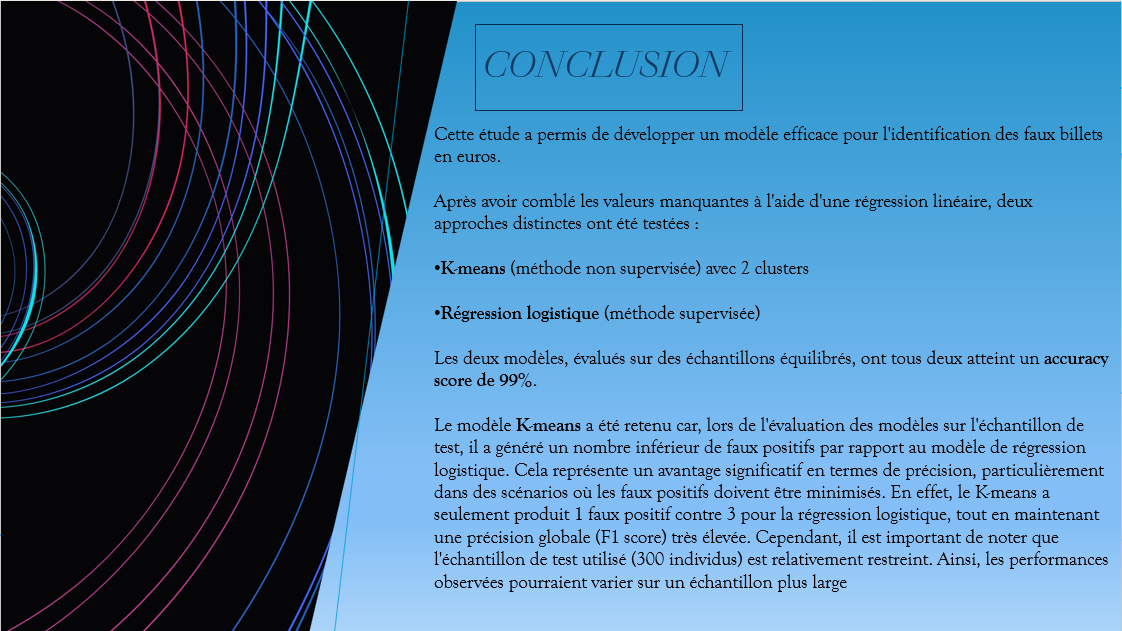

In [5]:
from IPython.display import Image
image_path1 = "C:\\Users\\Edine\\Documents\\OPC\\P10\\TRAVAUX\\Conclusion P10.png"
Image(filename=image_path1)